In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('/Users/qixuanlong/desktop/5231data.csv')
df.dropna(axis=0, how='any', inplace=True)
df.rename(columns={'Weekday or Weekend':'Day'}, inplace = True)
df['DW'] = df['Day'] * df['Weather']
df['TW'] = df['Time'] * df['Weather']
print(df)

    Unnamed: 0 Block  Day  Time  Weather  Utown  YIH  CLB  DW  TW
0            1     A    0     1        1     45   32   17   0   1
1            2     A    0     1        0     21   24   23   0   0
2            3     A    0     0        1     19   17    8   0   0
3            4     A    0     0        0     12   12    5   0   0
4            5     A    1     1        1     33   32   20   1   1
5            6     A    1     1        0     25   29   18   0   0
6            7     A    1     0        1     17   15    5   1   0
7            8     A    1     0        0     10    8    5   0   0
8            9     B    0     1        1     44   40   26   0   1
9           10     B    0     1        0     26   25   10   0   0
10          11     B    0     0        1     15   14    5   0   0
11          12     B    0     0        0      8   11    6   0   0
12          13     B    1     1        1     46   29   17   1   1
13          14     B    1     1        0     29   24   12   0   0
14        

<AxesSubplot:xlabel='Block', ylabel='CLB'>

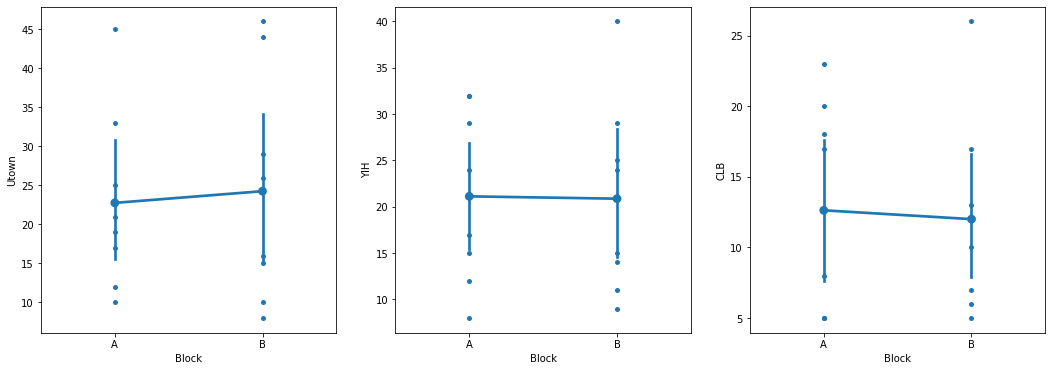

In [3]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
sns.pointplot(x="Block", y="Utown", data=df, ax=ax[0])
sns.stripplot(x="Block",y="Utown", data=df, jitter=False,ax=ax[0])
sns.pointplot(x="Block", y="YIH", data=df, ax=ax[1])
sns.stripplot(x="Block",y="YIH", data=df, jitter=False,ax=ax[1])
sns.pointplot(x="Block", y="CLB", data=df, ax=ax[2])
sns.stripplot(x="Block",y="CLB", data=df, jitter=False,ax=ax[2])

<AxesSubplot:xlabel='Day', ylabel='CLB'>

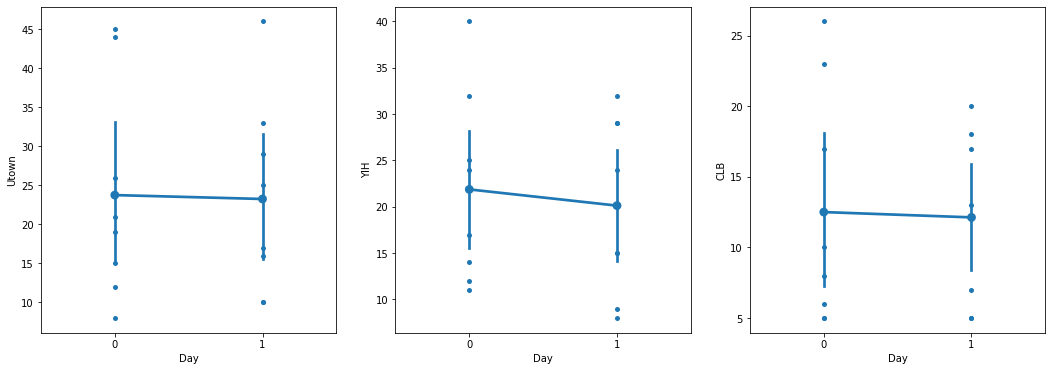

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
sns.pointplot(x="Day", y="Utown", data=df, ax=ax[0])
sns.stripplot(x="Day",y="Utown", data=df, jitter=False,ax=ax[0])
sns.pointplot(x="Day", y="YIH", data=df, ax=ax[1])
sns.stripplot(x="Day",y="YIH", data=df, jitter=False,ax=ax[1])
sns.pointplot(x="Day", y="CLB", data=df, ax=ax[2])
sns.stripplot(x="Day",y="CLB", data=df, jitter=False,ax=ax[2])

<AxesSubplot:xlabel='Time', ylabel='CLB'>

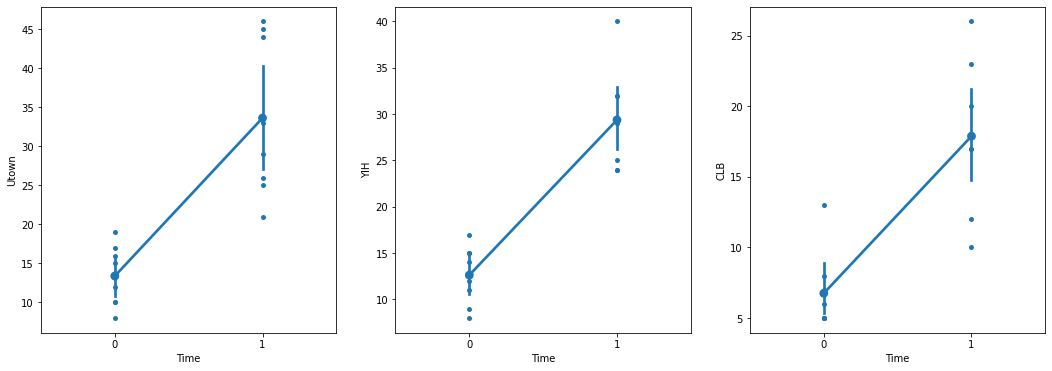

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
sns.pointplot(x="Time", y="Utown", data=df, ax=ax[0])
sns.stripplot(x="Time",y="Utown", data=df, jitter=False,ax=ax[0])
sns.pointplot(x="Time", y="YIH", data=df, ax=ax[1])
sns.stripplot(x="Time",y="YIH", data=df, jitter=False,ax=ax[1])
sns.pointplot(x="Time", y="CLB", data=df, ax=ax[2])
sns.stripplot(x="Time",y="CLB", data=df, jitter=False,ax=ax[2])

<AxesSubplot:xlabel='Weather', ylabel='CLB'>

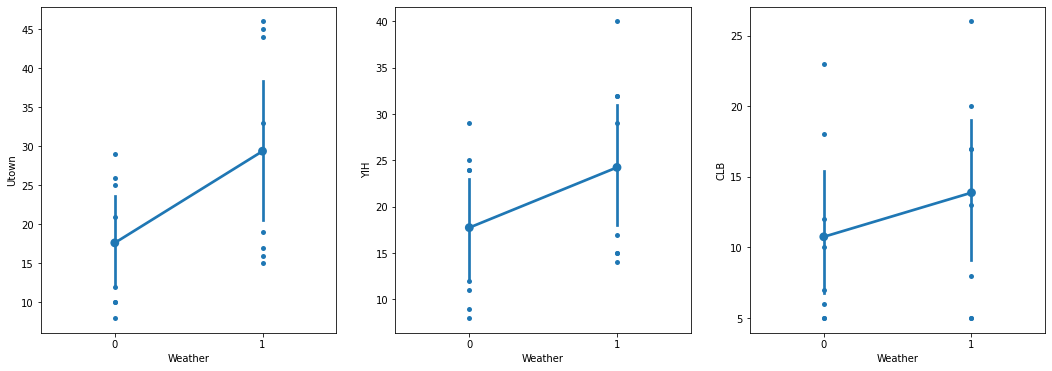

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
sns.pointplot(x="Weather", y="Utown", data=df, ax=ax[0])
sns.stripplot(x="Weather",y="Utown", data=df, jitter=False,ax=ax[0])
sns.pointplot(x="Weather", y="YIH", data=df, ax=ax[1])
sns.stripplot(x="Weather",y="YIH", data=df, jitter=False,ax=ax[1])
sns.pointplot(x="Weather", y="CLB", data=df, ax=ax[2])
sns.stripplot(x="Weather",y="CLB", data=df, jitter=False,ax=ax[2])

Text(0.5, 1.0, 'AB Interaction')

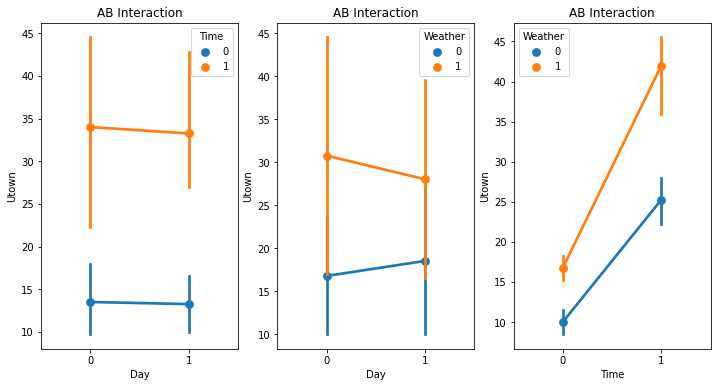

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
sns.pointplot(y="Utown",x="Day", hue="Time", data=df, ax=ax[0]).set_title("AB Interaction")
sns.pointplot(y="Utown",x="Day", hue="Weather", data=df, ax=ax[1]).set_title("AB Interaction")
sns.pointplot(y="Utown",x="Time", hue="Weather", data=df, ax=ax[2]).set_title("AB Interaction")

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model1 = ols('Utown ~ Time+Weather+TW', data=df).fit()
anova_table = sm.stats.anova_lm(model1, type=1)
# anova_table
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Utown   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     57.49
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           2.16e-07
Time:                        13:23:44   Log-Likelihood:                -41.099
No. Observations:                  16   AIC:                             90.20
Df Residuals:                      12   BIC:                             93.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0000      1.823      5.486      0.0

/Users/qixuanlong/miniforge3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
# YIH time 影响utown 导致utown insignificant
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('YIH ~ Time+Day+Block+Weather+DW+TW', data=df).fit()
anova_table = sm.stats.anova_lm(model, type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Block,1.0,0.25,0.250000,0.028213,0.870323
Time,1.0,1122.25,1122.250000,126.648903,0.000001
Day,1.0,12.25,12.250000,1.382445,0.269850
Weather,1.0,169.00,169.000000,19.072100,0.001805
DW,1.0,6.25,6.250000,0.705329,0.422747
TW,1.0,6.25,6.250000,0.705329,0.422747
Residual,9.0,79.75,8.861111,NaN,NaN


In [10]:
# CLB
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('CLB ~ Day+Block+Weather+Time+TW+Utown', data=df).fit()
anova_table = sm.stats.anova_lm(model, type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Block,1.0,1.562500,1.562500,0.077955,0.786398
Day,1.0,0.562500,0.562500,0.028064,0.870663
Weather,1.0,39.062500,39.062500,1.948875,0.196185
Time,1.0,495.062500,495.062500,24.699259,0.000770
TW,1.0,5.062500,5.062500,0.252574,0.627335
Utown,1.0,21.732441,21.732441,1.084257,0.324910
Residual,9.0,180.392559,20.043618,NaN,NaN


In [11]:
model.summary()
#筛除不显著因子，其余建模求最优

/Users/qixuanlong/miniforge3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLB   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     4.682
Date:                Fri, 04 Nov 2022   Prob (F-statistic):             0.0196
Time:                        13:23:44   Log-Likelihood:                -42.083
No. Observations:                  16   AIC:                             98.17
Df Residuals:                       9   BIC:                             103.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8721      4.429      2.229      0.053      -0.147      19.891
Block[T.B]    -0.0531      2.305     -0.023      0.982      -5.267       5.161
Day           -0.5656      2.246     -0.252      0.807      -5.646       4.515
Weather        4.5736      4.016      1.139      0.284      -4.512      13.659
Time          15.8144      6.419      2.464      0.036       1.294      30.335
TW             6.0627      5.784      1.048      0.322      -7.021      19.146
Utown         -0.3813      0.366     -1.041      0.325      -1.210       0.447
==============================================================================
Omnibus:                        0.975   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.861
Skew:                           0.475   Prob(JB):                        0.650
Kurtosis:                       2.377   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
crdmodel = ols('Utown ~ Day+Time+Weather', data=df).fit()
sm.stats.anova_lm(crdmodel, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
Day,1.0,1.00,1.000000,0.046422,0.833030
Time,1.0,1640.25,1640.250000,76.143133,0.000002
Weather,1.0,552.25,552.250000,25.636364,0.000278
Residual,12.0,258.50,21.541667,NaN,NaN


In [13]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Utown   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     57.49
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           2.16e-07
Time:                        13:23:44   Log-Likelihood:                -41.099
No. Observations:                  16   AIC:                             90.20
Df Residuals:                      12   BIC:                             93.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0000      1.823      5.486      0.0

/Users/qixuanlong/miniforge3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<a list of 8 text.Text objects>

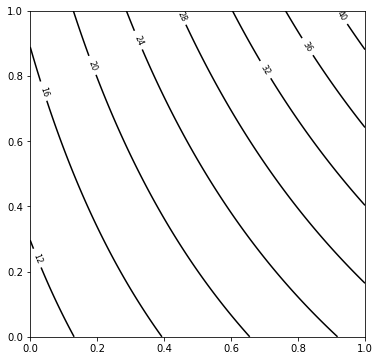

In [14]:
def f(x1,x2):
    return 10+15.25*x1+6.75*x2+10*x1*x2

x1 = np.linspace(0,1.0,200)  
x2 = np.linspace(0,1.0,200)
X, Y = np.meshgrid(x1, x2)
Z1 = f(X, Y)

fig, ax = plt.subplots(ncols=1, figsize=(6,6))
contours=ax.contour(X, Y, Z1, colors='black');
plt.clabel(contours, inline=True, fontsize=8)

In [15]:
df

,Unnamed: 0,Block,Day,Time,Weather,Utown,YIH,CLB,DW,TW
0,1,A,0,1,1,45,32,17,0,1
1,2,A,0,1,0,21,24,23,0,0
2,3,A,0,0,1,19,17,8,0,0
3,4,A,0,0,0,12,12,5,0,0
4,5,A,1,1,1,33,32,20,1,1
5,6,A,1,1,0,25,29,18,0,0
6,7,A,1,0,1,17,15,5,1,0
7,8,A,1,0,0,10,8,5,0,0
8,9,B,0,1,1,44,40,26,0,1
9,10,B,0,1,0,26,25,10,0,0


In [16]:
df1 = pd.read_csv('/Users/qixuanlong/desktop/ybar.csv')
df1.rename(columns={'Weekday or Weekend':'Day'}, inplace = True)
df1['DW'] = df1['Day'] * df1['Weather']
df1['TW'] = df1['Time'] * df1['Weather']
df1

,Day,Time,Weather,Utown,YIH,CLB,US2,YS2,CS2,DW,TW
0,0,1,1,44.5,36.0,21.5,0.5,32.0,40.5,0,1
1,0,1,0,23.5,24.5,16.5,12.5,0.5,84.5,0,0
2,0,0,1,17.0,15.5,6.5,8.0,4.5,4.5,0,0
3,0,0,0,10.0,11.5,5.5,8.0,0.5,0.5,0,0
4,1,1,1,39.5,30.5,18.5,84.5,4.5,4.5,1,1
5,1,1,0,27.0,26.5,15.0,8.0,12.5,18.0,0,0
6,1,0,1,16.5,15.0,9.0,0.5,0.0,32.0,1,0
7,1,0,0,10.0,8.4,6.0,0.0,0.5,2.0,0,0


<AxesSubplot:xlabel='Weather', ylabel='CLB'>

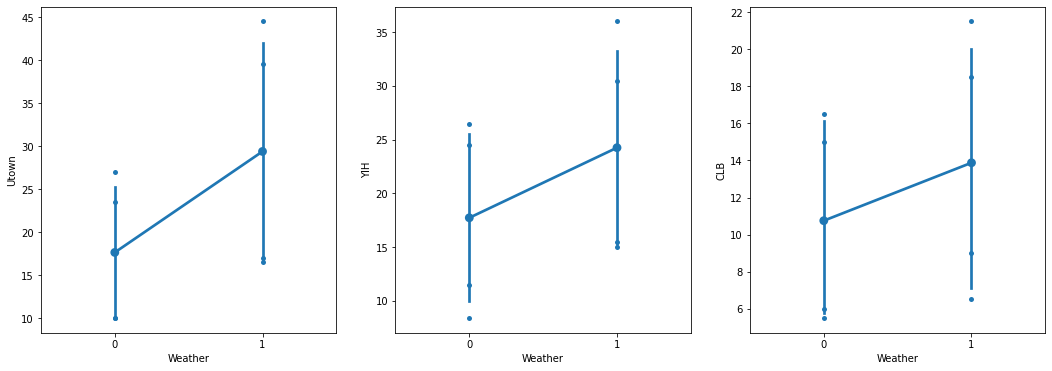

In [17]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
sns.pointplot(x="Weather", y="Utown", data=df1, ax=ax[0])
sns.stripplot(x="Weather",y="Utown", data=df1, jitter=False,ax=ax[0])
sns.pointplot(x="Weather", y="YIH", data=df1, ax=ax[1])
sns.stripplot(x="Weather",y="YIH", data=df1, jitter=False,ax=ax[1])
sns.pointplot(x="Weather", y="CLB", data=df1, ax=ax[2])
sns.stripplot(x="Weather",y="CLB", data=df1, jitter=False,ax=ax[2])

<AxesSubplot:xlabel='Time', ylabel='CLB'>

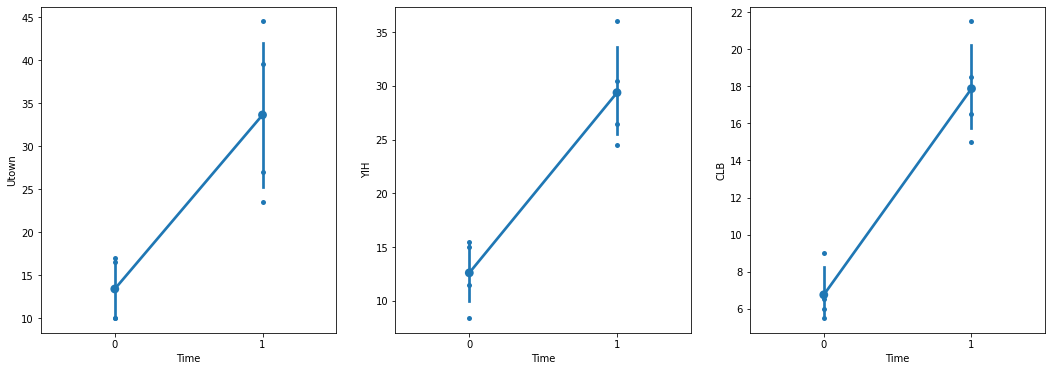

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
sns.pointplot(x="Time", y="Utown", data=df1, ax=ax[0])
sns.stripplot(x="Time",y="Utown", data=df1, jitter=False,ax=ax[0])
sns.pointplot(x="Time", y="YIH", data=df1, ax=ax[1])
sns.stripplot(x="Time",y="YIH", data=df1, jitter=False,ax=ax[1])
sns.pointplot(x="Time", y="CLB", data=df1, ax=ax[2])
sns.stripplot(x="Time",y="CLB", data=df1, jitter=False,ax=ax[2])

Text(0.5, 1.0, 'AB Interaction')

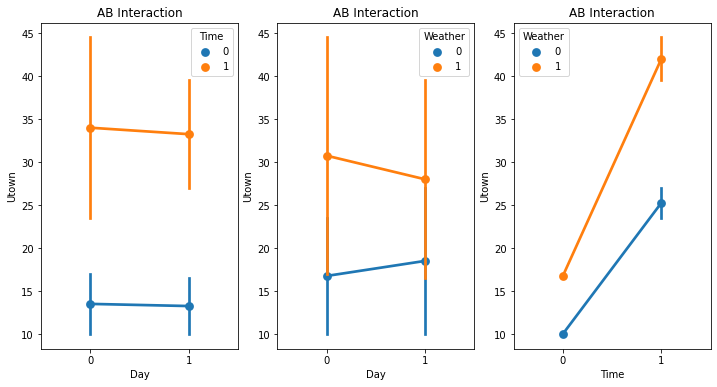

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
sns.pointplot(y="Utown",x="Day", hue="Time", data=df1, ax=ax[0]).set_title("AB Interaction")
sns.pointplot(y="Utown",x="Day", hue="Weather", data=df1, ax=ax[1]).set_title("AB Interaction")
sns.pointplot(y="Utown",x="Time", hue="Weather", data=df1, ax=ax[2]).set_title("AB Interaction")

In [20]:
crdmodel = ols('Utown ~ Day+Time+Weather+DW+TW', data=df1).fit()
sm.stats.anova_lm(crdmodel, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
Day,1.0,0.500,0.5000,0.123077,0.759228
Time,1.0,820.125,820.1250,201.876923,0.004917
Weather,1.0,276.125,276.1250,67.969231,0.014396
DW,1.0,10.125,10.1250,2.492308,0.255155
TW,1.0,50.000,50.0000,12.307692,0.072522
Residual,2.0,8.125,4.0625,NaN,NaN


In [21]:
crdmodel = ols('Utown ~ Time+Weather+TW', data=df1).fit()
sm.stats.anova_lm(crdmodel, type=1)

,df,sum_sq,mean_sq,F,PR(>F)
Time,1.0,820.125,820.1250,174.960000,0.000189
Weather,1.0,276.125,276.1250,58.906667,0.001550
TW,1.0,50.000,50.0000,10.666667,0.030906
Residual,4.0,18.750,4.6875,NaN,NaN


In [22]:
print(crdmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Utown   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     81.51
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           0.000483
Time:                        13:23:45   Log-Likelihood:                -14.759
No. Observations:                   8   AIC:                             37.52
Df Residuals:                       4   BIC:                             37.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0000      1.531      6.532      0.0

/Users/qixuanlong/miniforge3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
def ybar(x1,x2):
    return 10 + 15.25*x1+6.75*x2+10*x1*X2

In [24]:
crdmodel = ols('CS2 ~ Time+Weather+TW', data=df1).fit()
sm.stats.anova_lm(crdmodel, type=1)
print(crdmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    CS2   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.065
Date:                Fri, 04 Nov 2022   Prob (F-statistic):              0.457
Time:                        13:23:45   Log-Likelihood:                -35.365
No. Observations:                   8   AIC:                             78.73
Df Residuals:                       4   BIC:                             79.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2500     20.120      0.062      0.9

/Users/qixuanlong/miniforge3/envs/py39/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [56]:
def ybar(x):
    return 10 + 15.25*x[0]+6.75*x[1]+10*x[0]*x[1]

def logvar(x):
    return 1.25 + 50*x[0] + 17*x[1] - 45.75*x[0]*x[1]

x1 = np.linspace(-1.414,1.414,200)  
x2 = np.linspace(-1.414,1.414,200)
X, Y = np.meshgrid(x1, x2)
YM = np.zeros(X.shape);
YVar = np.zeros(X.shape);

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        YM[i,j] = ybar(np.array([X[i,j], Y[i,j]]))
        YVar[i,j] = logvar(np.array([X[i,j], Y[i,j]]))

<a list of 6 text.Text objects>

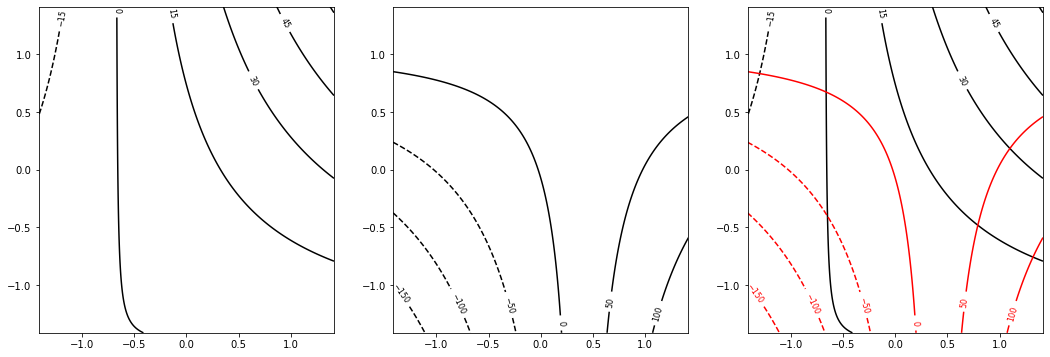

In [57]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))
contours=ax[0].contour(X, Y, YM, colors='black');
plt.clabel(contours, inline=True, fontsize=8)

contours=ax[1].contour(X, Y, YVar, colors='black');
plt.clabel(contours, inline=True, fontsize=8)

contours=ax[2].contour(X, Y, YM, colors='black');
plt.clabel(contours, inline=True, fontsize=8)
contours=ax[2].contour(X, Y, YVar, colors='red');
plt.clabel(contours, inline=True, fontsize=8)

In [58]:
from scipy.optimize import LinearConstraint, Bounds, minimize, NonlinearConstraint,LinearConstraint

def s2(x):
    return 1.25 + 50*x[0] + 17*x[1] - 45.75*x[0]*x[1]
def logs_hess(x):
    return np.zeros([len(x),len(x)]);

bounds = Bounds([0, 0], [1, 1])
# con = lambda x: 10 + 15.25*x[0]+6.75*x[1]+10*x[0]*X[1]
# non_linearConstraint = NonlinearConstraint(con, 0, 42)
constraint = LinearConstraint([[15.25,6.75]],[-10],[5])
x0 = np.array([0.5, 0.5])

res = minimize(s2, x0, method='trust-constr', hess =logs_hess, constraints=[constraint], options={'verbose': 1}, bounds=bounds)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 27, CG iterations: 9, optimality: 7.91e-09, constraint violation: 0.00e+00, execution time: 0.015 s.


In [59]:
res

 barrier_parameter: 0.0008000000000000003
 barrier_tolerance: 0.0008000000000000003
          cg_niter: 9
      cg_stop_cond: 4
            constr: [array([0.00044114]), array([1.43583493e-05, 3.29144144e-05])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.015390872955322266
               fun: 1.2512774408900809
              grad: array([49.99849416, 16.99934311])
               jac: [array([[15.25,  6.75]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([-1.17846355e-09, -7.91369814e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 27
              nhev: 9
               nit: 12
             niter: 12
              njev: 9
        optimality: 7.913698141237546e-09
            status: 1
           success: True
         tr_radius: 3117.88685636846
                 v: [array([8.00212165

In [55]:
print(s2([1.43708016, 1.19346171]))
# yabr([1,1])

14.927025428899185


In [40]:
def yabr(x):
    return 10 + 15.25*x[0]+6.75*x[1]+10*x[0]*x[1]

In [66]:
def dcf(year, cr, ytm, par):
    i = 1
    pv = 0
    cr = cr * 0.01
    ytm = ytm * 0.01
    while i <= year:
        if i < year:
            pv += (par * cr) / ((1+ytm)**i)
            i += 1
        else:
            pv += (par + par * cr) / ((1+ytm)**i)
#             print(pv)
            return pv
    
        

In [109]:
dcf(120,, 0.25, 0)

0.0

In [74]:
dcf(2,3,4,100)

98.11390532544378

In [89]:
# !pip install sympy
from sympy import *


x = symbols('x')
z = solve(6/(1+x)+6/(1+x)**2+106/(1+x)**3-90.24500441072213, x)
print(z)

# 0.04 0.06 0.06


[0.0991689000751720, -1.51634161272388 - 0.895543940509787*I, -1.51634161272388 + 0.895543940509787*I]


In [88]:
6/(1+0.08) + 6/(1+0.09)**2 + 106/(1+0.1)**3

90.24500441072213

In [95]:
66/180 * 2.5

0.9166666666666666

In [100]:
66/180*(2)

0.7333333333333333

In [107]:
66/180 * 2.5

0.9166666666666666

In [113]:
i = 1
pv = 0
while (i <= 120):
    pv += 1500/(1+0.03)**(i/4)
    i+=1
pv

118917.53068563824